In [2]:
# Owner:      Chilin Tang, Data & Analytics, Digitas Singapore, chilin.tang@digitas.com

# Solution:   Multiple linear regression for marketing mix modeling, predicting dependent variable (y) from one/more dependent variables (x) through mix modeling such as MMM

# Date of publication:  31 March 2022

# Data requirements:  
#                     1) Relationship between dependent variable and independent variables is (approximately) linear
#                     2) Expected mean error of the regression model is zero
#                     3) Residuals are uncorrelated with each others (i.e. no multicollinearity)
#                     4) Errors (residuals) are normally distributed and have 0 population mean
#                     5) Residuals do not vary with x (i.e. constant variance, no heteroskedacticity)


In [2]:
#  pip install scipy numpy pandas statsmodels pingouin

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
matplotlib.style.use('ggplot')
from sklearn import metrics
from sklearn import linear_model
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
# import pingouin as pg
# from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Fetch a single <10MB file using the raw GitHub URL.
!curl --remote-name \
-H 'Accept: application/vnd.github.v3.raw' \
--location https://raw.githubusercontent.com/Digitas-Singapore/Chilin-s-Github-datasets/main/MarketingMixEffectiveness.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   496  100   496    0     0   2492      0 --:--:-- --:--:-- --:--:--  2492


In [5]:
# Load Marketing Mix data set
mmm = pd.read_csv("MarketingMixEffectiveness.csv") #reads text data into data frame
# Open and read in data from MarketingMixEffectiveness.csv

In [6]:
#  Views the MMM dataset with marketing spreads and spends
mmm

,Date,Sales,TVC Spends,Digital Impressions,Distribution Channels
0,Jan-16,37,6,3000000,1
1,Feb-16,89,27,0,2
2,Mar-16,82,0,4000000,3
3,Apr-16,58,0,0,4
4,May-16,110,20,5000000,5
5,Jun-16,77,0,0,6
6,Jul-16,103,20,0,7
7,Aug-16,78,0,0,8
8,Sep-16,95,0,8000000,9
9,Oct-16,106,18,0,10


In [7]:
#  Structure of MMM dataset
#	 Date	                  Monthly collation of sales and marketing investments
#  Sales	                Monthly sales figures, in thousands
#  TVC Spends             Amount spent on TVC monthly
#  Digital Impressions	  Amount of impressions achieved monthly on digital media
#  Distribution Channels  Number of distribution channels the company maintains on monthly basis for product sales


In [8]:
# Descriptive statistics for Exploratory Data Analysis
mmm.describe()

,Sales,TVC Spends,Digital Impressions,Distribution Channels
count,20.000000,20.00000,2.000000e+01,20.00000
mean,102.800000,7.65000,4.150000e+06,10.50000
std,36.568033,9.78331,5.343712e+06,5.91608
min,37.000000,0.00000,0.000000e+00,1.00000
25%,81.000000,0.00000,0.000000e+00,5.75000
50%,96.000000,0.00000,1.500000e+06,10.50000
75%,115.500000,15.75000,5.750000e+06,15.25000
max,198.000000,27.00000,1.600000e+07,20.00000


In [9]:
# =================================== Developing the Multi Linear Regression Model ================================

In [10]:
mmm.iloc[:,1:5]
# Taking the dataset without dates   

,Sales,TVC Spends,Digital Impressions,Distribution Channels
0,37,6,3000000,1
1,89,27,0,2
2,82,0,4000000,3
3,58,0,0,4
4,110,20,5000000,5
5,77,0,0,6
6,103,20,0,7
7,78,0,0,8
8,95,0,8000000,9
9,106,18,0,10


In [11]:
# creates a model where Sales (Y axis) is attributed from TVC Spends, Digital Impressions and Distribution Channels (X axis)
X=mmm.iloc[:,2:5]
Y=mmm.Sales

X2 = sm.add_constant(X)
est = sm.OLS(Y, X2).fit()
print(est.summary2())

                  Results: Ordinary least squares
Model:               OLS               Adj. R-squared:      0.796   
Dependent Variable:  Sales             AIC:                 172.4874
Date:                2022-03-31 08:20  BIC:                 176.4704
No. Observations:    20                Log-Likelihood:      -82.244 
Df Model:            3                 F-statistic:         25.68   
Df Residuals:        16                Prob (F-statistic):  2.35e-06
R-squared:           0.828             Scale:               273.05  
--------------------------------------------------------------------
                       Coef.  Std.Err.   t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------
const                 39.3456   8.6568 4.5450 0.0003 20.9939 57.6973
TVC Spends             1.9749   0.3920 5.0383 0.0001  1.1440  2.8059
Digital Impressions    0.0000   0.0000 3.1280 0.0065  0.0000  0.0000
Distribution Channels  3.6348   0.7158 5.0778 0.0001 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#  This is how linear regression table can be interpreted for attribution.  Statistically significant variables are: 
#  Sales = 39.3456 (residual) + 3.6348∗Distribution Channels + 1.9749∗TVC spends.  Digital impressions are insignificant


In [ ]:
# =================== Evaluating goodness of fit and error mitigation (Multicollinearity and Variance Inflation Factor (VIF) ====================

In [ ]:
#  When there is a high intercorrelation between two or more independent variables in a multiple regression model, it is called multicollinearity.
#  Multicollinearity can make the model unstable and the statistically significant feature may be labelled as statistically insignificant (large p-value).
#  Variance Inflation Factor (VIF) is measuring the magnitude of multicollinearity. VIF is given by  1/(1−𝑅²) . 
#  Its number indicates by how much larger the standard error is increased, in presence of multicollinearity. 
#  The threshold usually VIF>4 or VIF>10 to go through to check the impact of multicollinearity.

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=[variance_inflation_factor(X.values, j) for j in range(X.shape[1])]
vif_factor=pd.DataFrame({'VIF': vif},index=X.columns)
vif_factor

,VIF
TVC Spends,1.322639
Digital Impressions,1.998034
Distribution Channels,2.280024


In [ ]:
#  Checking the correlation matrix

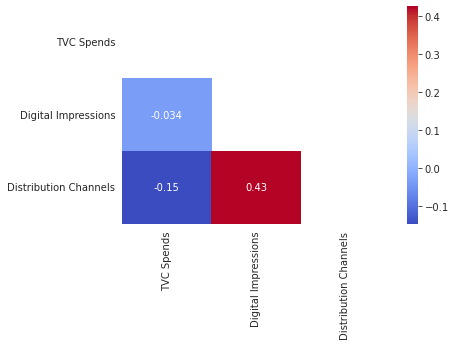

In [13]:
sns.set_style("whitegrid")
mask = np.triu(np.ones_like(X.corr()))
corr = sns.heatmap(X.corr(), annot=True, cmap='coolwarm', mask=mask)

In [14]:
#  Feature selection:  The correlation matrix above shown that there is low correlation ( <0.70 ) between features:
#  if correlation is >0.70, we can use VIF factor to mitigate correlation risks, apply Linear Regression only to variables with lower correlations

In [15]:
vif_factor['p-values']=est.pvalues[1:]
vif_factor

,VIF,p-values
TVC Spends,1.322639,0.000121
Digital Impressions,1.998034,0.006488
Distribution Channels,2.280024,0.000112


In [ ]:
#  Measured between VIF and p-values, the feature sets least impacted by multicollinearity are:


In [ ]:
#  This results in a better model, with Adjusted R-squared being higher at 83.4% (compared to 80.7%). 
#  Multicollinearity is already handled and all the variables are statistically significant (p-value < 0.05).

In [ ]:
#  Other ways to handling multicollinearity are:

#  1.  Use centred variables for example use  𝑋𝑖−𝑋 mean  instead of  𝑋𝑖 , or any other transformation
#  2.  Apply Principal Component Analysis (PCA) to reduce features to a smaller set of uncorrelated (orthogonal) components.

In [ ]:
# =================================== Residual Analysis (to see if normally distributed) ============================================